# FN6815 Numerical Methods for Financial Instrument Pricing

# Lecture 6: Numerical Differentiation and Integration

-   Dr. Yang Ye
-   Email: yy@runchee.com
-   2023/2024 Mini Term 5


## 1. Intro

### 1.1 Is Differentiation Easier or Integration?

In general, differentiation is often considered easier than integration. Let's consider the following examples:

**Differentiation**: $$\frac{d}{dx} \cos(x^2 + \ln x + 14e^{-x})$$

**Integration**: $$\int_{1}^{x}\cos (t^{2}+\ln t+14e^{-t})dt$$

Differentiation follows a set of well-defined rules, such as the chain rule, product rule, and quotient rule. Therefore, differentiating is straightforward.

On the other hand, integration can be more complex, especially when dealing with definite integrals or integrals of complex functions. The integral may not have a simple closed-form solution and might require numerical methods for evaluation.


### 2. Numerical Differentiation

#### 2.1 1st order differentiation

Given a differentiable function $f(x)$, its derivative is defined as:

$$f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}$$

This is the limit of the difference quotient as $h$ approaches $0$.

According to Taylor's series, we can express $f(x+\Delta x)$ as:

$$
f(x+\Delta x) = f(x) + \Delta x f'(x) + \Delta x^2 \frac {f''(x)} {2!} + \Delta x^3 \frac {f'''(\xi_1)} {3!}, \mathit{where}\; \xi \in [x, x + \Delta x]
$$

This series provides an approximation of $f(x+\Delta x)$ in terms of the function's derivatives at $x$.

### Methods to Approximate $f'(x)$

We can approximate the derivative $f'(x)$ using finite differences, where $h > 0$ is a small number. Here are three common methods:

Methods to approximate ${f}'(x)$. Here, $h > 0$ is a small number.

-   **Forward difference method**: This method uses the value of the function at $x$ and $x+h$ to approximate the derivative. $\left.D^{+}{f} \right |{_{x}}=\frac{f(x+h)-f(x)}{h}$
-   **Backward difference method**: This method uses the value of the function at $x$ and $x-h$ to approximate the derivative. $\left.D^{-}{f} \right |{_{x}}=\frac{f(x)-f(x-h)}{h}$
-   **Central difference method**: This method uses the value of the function at $x-h$ and $x+h$ to approximate the derivative, providing a more accurate estimate. $\left.D^{c}{f} \right |{_{x}}=\frac{f(x+h)-f(x-h)}{2h}$

Here's how you can implement these methods in Python:

```python
def forward_difference(f, x, h=1e-7):
    return (f(x + h) - f(x)) / h

def backward_difference(f, x, h=1e-7):
    return (f(x) - f(x - h)) / h

def central_difference(f, x, h=1e-7):
    return (f(x + h) - f(x - h)) / (2 * h)
```

In these functions, `f` is the function to differentiate, `x` is the point at which to evaluate the derivative, and `h` is a small number representing $\Delta x$. Each function returns the approximate value of $f'(x)$ using the corresponding method.


#### Discussion

1. **Approximation in Numerical Differentiation and Error Estimation**: The error in this approximation depends on the step size $h$ and the method used.

2. **Accuracy of Central Difference Method**: For instance, the central difference method has an error of order $O(h^2)$, while the forward and backward difference methods have an error of order $O(h)$.

3. **Extended Finite Difference Method**: Suppose we want to derive a finite difference method with the following form:

$$Df(x)=a_{1}f(x-2h)+a_{2}f(x-h)+a_{3}f(x)+a_{4}f(x+h)+a_{5}f(x+2h)$$

What should be $a_{1},...,a_{5}$? (Hint: with Taylor series up to terms of $\Delta x^3$)


#### 2.2 2nd Order Diff

Let $f(x)$ be a function. How do we calculate ${f}''(x)$ numerically?

-   Central difference for ${f}'(x)$:
    $${f}''(x) \approx D^{c}{f}'(x) = \frac{{f}'(x+h)-{f}'(x-h)}{h}$$
-   Forward difference for ${f}'(x-h)$:
    $${f}'(x-h) \approx D^{+}f(x-h)= \frac{f(x)-f(x-h)}{h}$$
-   Backward difference for ${f}' (x+h)$:
    $${f}'(x+h) \approx D^{-}f(x+h)= \frac{f(x+h)-f(x)}{h}$$

Combining all things together:

-   2nd order difference for ${f}''(x)$: $${f}''(x) \approx D^{2} f(x)= \frac{f(x+h)-2f(x)+f(x-h)}{h^{2}}$$


#### 2.3 Exercise

Given the function $f(x)= x^{3}-4x\sin(x)$, we want to calculate the forward, backward, and central differences at $x=1$ for $h = 10^{-i}$, where $i = 0,1,...,9$. We will store the values of $h$ and the errors of each calculation in a $10 \times 4$ matrix and plot the results.

This exercise helps to understand the relationship between the step size $h$ and the error in numerical differentiation and the error in numerical differentiation.


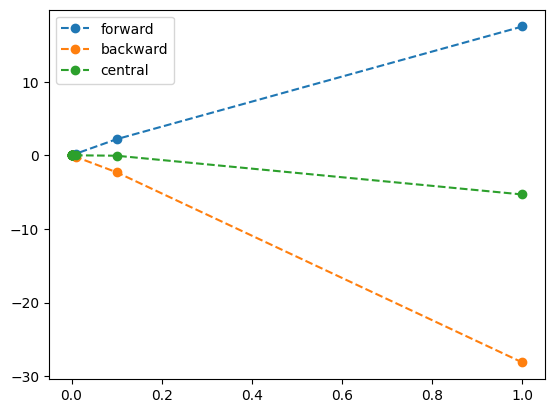

In [1]:
# Sample exercise
# Try not to look at the code below and write your own version.

import matplotlib.pyplot as plt
import numpy as np

result = np.ones((10, 4))
F = lambda x: x**3 - 4 * x * np.sin(x)
dF_dx = lambda x: 3 * x**2 - 4 * x * np.cos(x) - 4 * np.sin(x)
x_0 = 10
for i in range(10):
    h = 10**-i

    dF_dx_x_0 = dF_dx(x_0)
    result[i, 0] = h
    result[i, 1] = (F(x_0 + h) - F(x_0)) / h - dF_dx_x_0
    result[i, 2] = (F(x_0) - F(x_0 - h)) / h - dF_dx_x_0
    result[i, 3] = (F(x_0 + h) - F(x_0 - h)) / h / 2 - dF_dx_x_0

plt.plot(result[:, 0], result[:, 1], "o--", label="forward")
plt.plot(result[:, 0], result[:, 2], "o--", label="backward")
plt.plot(result[:, 0], result[:, 3], "o--", label="central")
plt.legend()
plt.show()

The previous exercise provides insight into how the step size, $h$, influences the error in numerical differentiation.

The demonstration code below uses a fixed interval $h$ for numerical differentiation using forward, backward, and central difference methods. We shall realize that the backward scheme is nothing more than the shifted forward scheme.

It then compares the error between the analytical and numerical results. This helps us visually understand the error terms of the order of h $O(h)$ and the order of h squared$O(h^2)$.


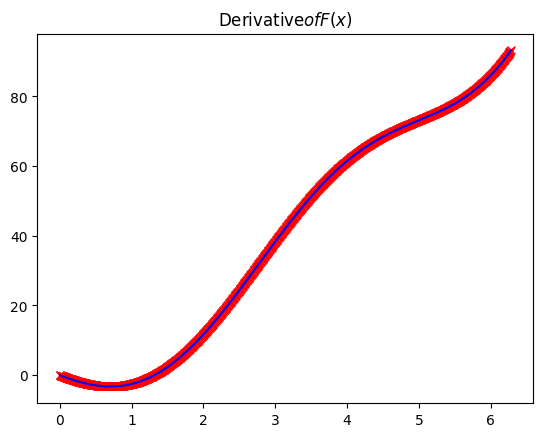

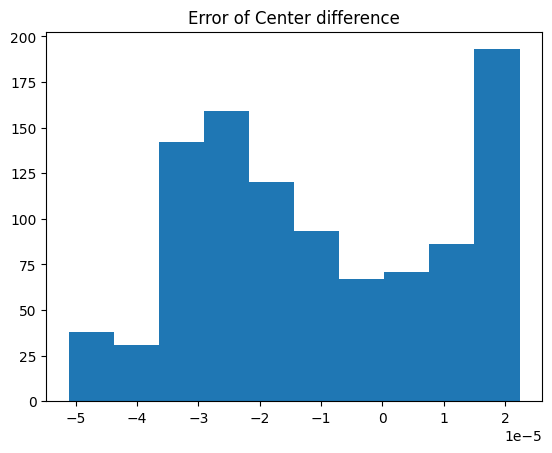

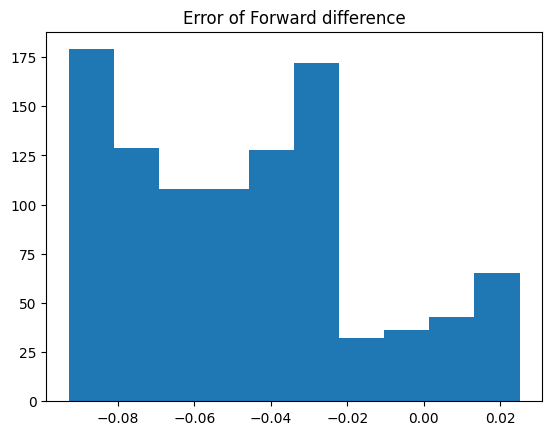

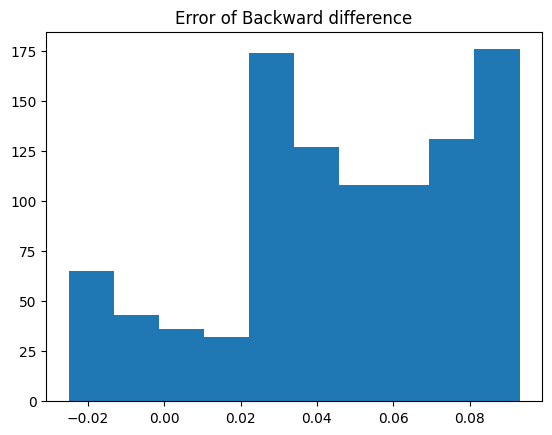

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def calc_diff(F, dF_dx):
    # calculate the sin() function on evenly spaced data.
    x = np.linspace(0, 2 * np.pi, 1001)
    y = F(x)

    # calculate the derivative dy/dx numerically.
    # First, calculate the distance between adjacent pairs of
    # x and y values.
    dy = y[1:] - y[:-1]
    dx = x[1:] - x[:-1]

    # Now divide to get "rise" over "run" for each interval.
    dy_dx = dy / dx

    # Assuming central differences, these derivative values
    # centered in-between our original sample points.
    centers_x = (x[1:] + x[:-1]) / 2.0

    # x for Forward differences
    forward_x = x[:-1]

    # x for Backward differences
    backward_x = x[1:]

    plt.plot(centers_x, dy_dx, "rx", centers_x, dF_dx(centers_x), "b-")
    plt.title(r"$\mathrm{Derivative} of F(x)$")
    plt.show()

    plt.hist(dF_dx(centers_x) - dy_dx)
    plt.title(r"Error of Center difference")
    plt.show()

    plt.hist(dF_dx(forward_x) - dy_dx)
    plt.title(r"Error of Forward difference")
    plt.show()

    plt.hist(dF_dx(backward_x) - dy_dx)
    plt.title(r"Error of Backward difference")
    plt.show()


F = lambda x: x**3 - 4 * x * np.sin(x)
dF_dx = lambda x: 3 * x**2 - 4 * x * np.cos(x) - 4 * np.sin(x)
calc_diff(F, dF_dx)

#### 2.4 Discussion

Is the following the best approximation for the second derivative, ${f}''(x)$? (Hint: Consider the Taylor expansion)

$$
{f}''(x)\approx D^{2}f(x)= \frac{f(x+h)-2f(x)+f(x-h)}{h^{2}}
$$

This formula is derived from the Taylor series expansion and is known as the central difference approximation for the second derivative. It provides a more accurate estimate than the forward or backward difference approximations.

However, it's not the only approximation. For instance, the five-point stencil provides an even more accurate approximation by using more points in the calculation.

Reference: [https://en.wikipedia.org/wiki/Five-point_stencil](https://en.wikipedia.org/wiki/Five-point_stencil)


## 3. Integration

Traditionally, integration is calculated using the Fundamental Theorem of Calculus:

$$
\int_a^b f(x) \mathrm{d} = F(a) - F(b)
$$

where $F(x)$ is the antiderivative of $f(x)$, i.e.,

$$
\frac {\mathrm{d} F(x)} {\mathrm{d}x} = f(x)
$$

The challenge lies in finding the antiderivative $F(x)$ for a given $f(x)$. While it's straightforward for some simple integrands $f(x)$, it can quickly become complex!

Numerical methods for integration don't require the exact form of $F(x)$, trading some accuracy for simplicity.

<div class="alert alert-block alert-success">The Cumulative Distribution Function (CDF) of the standard normal distribution doesn't have a simple closed-form antiderivative. It must be computed numerically.
</div>


### 3.1 Numerical Integration

Numerical integration methods approximate an integral by summing function evaluations, where each evaluation $f(x_i)$ is given a weight $w_i$:

$$
\int_{b}^{a} = f(x) \mathrm{d}x = \sum_{i=0}^{n-1}\it{w_i}f(x_i)
$$

Different methods determine the evaluation points $x_i$ and the weights $\it{w}_i$ differently. While we've used equally spaced points $x_i$, higher accuracy can be achieved by optimizing their locations.


#### 3.1.2 Linear approximation

The Rectangle rule, also known as the Riemann integral, is essentially the definition of integration:

$$
\int_{a}^{b}f(x)dx=\lim_{n \to \infty }h\sum_{i=0}^{n-1}f(\lambda a_{i}+(1-\lambda )a_{i+1})
$$

Here are three common methods based on this rule:

-   Rectangle rule: $I_R = f(a) (b - a)$ or $I_R = f(b) (b - a)$
-   Midpoint rule: $I_M = f(\frac {a+b} {2}) (b - a)$
-   Trapezoidal rule: $I_T = \frac {f(a) + f(b)} {2} (b - a)$

Each method makes a different assumption about the function $f$ on the interval $[a_{i} , a_{i+1}]$:

-   Rectangle or Midpoint Rule assumes $f$ is constant.
-   Trapezoidal Rule assumes $f$ is linear. It's more accurate than the rectangle rule or midpoint rule.

We skip the implementation of rectangle rule and only implement for the midpoint rule because of their similarity.


In [3]:
## For demonstration, we use built-in Python not numpy.
## Try numpy-ize it to speed up.

import math


def midpoint(f, a, b, n):
    h = float(b - a) / n
    result = 0
    for i in range(n):
        result += f(a + i * h + h / 2)
    result *= h
    # Alternative, Use list comprehension
    result2 = h * sum(f(a + i * h + h / 2) for i in range(n))
    assert math.isclose(result, result2)
    return result


def trapezoidal(f, a, b, n):
    """
    For three-point boundary: a-m-b
        (f(a) + f(m))/2 + (f(m) + f(b))/2 = (f(a) + f(b))/2 + f(m)
    """
    h = float(b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    result *= h
    return result

In [4]:
# v is the function to be integrated
v = lambda t: 3 * (t**2) * np.exp(t**3)
# V is the anti-derivative of v
V = lambda t: np.exp(t**3)
# Exact answer to integration is
exact = V(1) - V(0)

print(f"exact: { exact}")

print("V function")
for n in [4, 40, 400]:
    print(f"With n={n}")

    numerical = trapezoidal(v, 0, 1, n=n)
    print(f"trap: {exact - numerical, numerical}")

    numerical = midpoint(v, 0, 1, n=n)
    print(f"midpoint: {exact - numerical, numerical}")

print()
print("CDF function")

pdf_func = (
    lambda x, sigma=1, mu=0: 1
    / sigma
    / np.sqrt(2 * np.pi)
    * np.exp(-((x - mu) ** 2) / 2 / sigma**2)
)

for n in [4, 40, 400]:
    print(f"With n={n}")

    numerical = trapezoidal(pdf_func, -6, 6, n=n)
    print(f"trap: {1 - numerical, numerical}")

    numerical = midpoint(pdf_func, -6, 6, n=n)
    print(f"midpoint: {1 - numerical, numerical}")

exact: 1.718281828459045
V function
With n=4
trap: (-0.20443492200853108, 1.9227167504675762)
midpoint: (0.09930669065066411, 1.618975137808381)
With n=40
trap: (-0.0021227957268874498, 1.7204046241859325)
midpoint: (0.0010610747051011948, 1.717220753753944)
With n=400
trap: (-2.1236490512777095e-05, 1.7183030649495579)
midpoint: (1.0618212903379387e-05, 1.7182712102461417)

CDF function
With n=4
trap: (-0.22341794990357466, 1.2234179499035747)
midpoint: (0.2227985235580081, 0.7772014764419919)
With n=40
trap: (2.49452070111289e-09, 0.9999999975054793)
midpoint: (1.7219126124956574e-09, 0.9999999982780874)
With n=400
trap: (1.9786416949330032e-09, 0.9999999980213583)
midpoint: (1.9704431419853563e-09, 0.9999999980295569)


### 3.2 Simpson's rule

This Simpson? Not him! (Use of courtesy)

Increasing the order of the numerical integration method can indeed help reduce error and increase convergence.

For instance, Simpson's Rule assumes that $f$ is quadratic on the interval $[a_{i} , a_{i+2}]$. This method requires an even number of intervals.

Note: This Simpson's Rule is a numerical integration method, not to be confused with any person named Simpson!

![simpsons](img/06/simpsons.png)


If we only know three values of $f(x)$, Simpson's Rule is the most precise method. It approximates the integral by fitting a second-order polynomial to these three points:

$$
\int_{a}^{b}f(x)dx\approx \frac{b-a}{6}\cdot \left [f(a)+4f(\frac{a+b}{2})+f(b) \right ]
$$

For more points, higher-order Simpson's rules or other methods can be used:

-   3rd order Simpson’s rule:

    $$
    \int_{a}^{b}f(x)dx\approx \frac{b-a}{8} \cdot \left [ f(a_{0})+3f(a_{1})+3f(a_{2})+f(a_{3}) \right ], \, where\; a_{3} = b.
    $$

-   4th order rule — Boole’s rule:
    $$
    \int_{a}^{b}f(x)dx\approx \frac{b-a}{90} \cdot \left [ 7f(a_{0})+32f(a_{1})+12f(a_{2})+32f(a_{3})+7f(a_{4}) \right ], \, where\; a_{4} = b.
    $$


Simpson's Rule is a convenient method for numerical integration, and it's readily available in the `scipy` library. It's straightforward to use and typically provides accurate results for functions that are smooth and well-behaved.


In [5]:
import numpy as np
from scipy.integrate import simps

f = lambda x: np.sin(x)
a = 0
b = np.pi / 2

# Define the number of points
n = 1000
x = np.linspace(a, b, n)

# Compute the integral using Simpson's rule
integral = simps(f(x), x)
print(integral)

1.0000000000000335


/tmp/ipykernel_212784/3419319938.py:13: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  integral = simps(f(x), x)


#### Error estimates

The error in approximating an integral can be estimated for each method, where $\xi$ (the Greek letter xi) is some number between $a$ and $b$.

For Rectangle rule (order of 2)

$$
\epsilon_{Rect} = \frac {(b-a)^2} 2 f^{\prime}(\xi)
$$

For Midpoint rule (order of 3)

$$
\epsilon_{Mid} = \frac {(b-a)^3} {24} f^{\prime\prime}(\xi)
$$

For Trapezoidal rule (order of 3)

$$
\epsilon_{trap} = \frac {(b-a)^3} {12} f^{\prime\prime}(\xi)
$$

For Simpson's rule (order of 5)

$$
\epsilon_{simpson} = \frac {{\left(b-a\right)}^5} {2880} f^{\prime\prime\prime\prime}(\xi)
$$

These formulas provide an estimate of the error in the approximation of the integral by each method. The order indicates the rate at which the error decreases as the interval size decreases. Higher order methods typically provide more accurate results.

Please note that these error estimates assume that the function $f$ and its derivatives are continuous and well-behaved on the interval $[a, b]$. In practice, the actual error may be larger due to numerical issues such as round-off error.


### Summary for Even-Spaced Methods

-   Error analysis reveals that for a **smooth** function $f$ on the interval $[a,b]$, where all derivatives are bounded, the error decreases faster with higher-order rules as the number of grid points increases. Therefore, fewer grid points are typically needed to achieve the same accuracy with a higher-order rule.

-   Using a low-order rule often requires many grid points to ensure sufficient accuracy. This can lead to lengthy computations, especially when the integrand is computationally expensive.

-   Trapezoidal rule and Simpson's rule are the commonly used methods.

If we have a function that is not smooth, or if we need to integrate over a large interval, we may need to use more advanced methods, such as Gaussian Quadrature, with unevenly spaced intervals. It provides a higher degree of accuracy for the same number of function evaluations.


### 3.3 Gaussian Quadrature (GQ) Method

Suppose we know the formula for $f(x)$ and we want to construct a method with weights $w$ of only a few points. This leads us to a group of numerical methods known as **Gaussian Quadrature** methods.

$$
\int_{-1}^{1}f(x)dx\approx \sum_{i=1}^{n}w_{i}f(x_{i})
$$

Gaussian Quadrature methods yield exact results for polynomials of degree $2N-1$ when interpolating with the $n^{th}$ power of $P(x)$. These methods allow for uneven spacing between intervals, which can significantly improve convergence time.

Reference: [https://en.wikipedia.org/wiki/Gaussian_quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)


In [6]:
import numpy as np

g5_w = np.array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689])
g5_x = [-0.90617985, -0.53846931, 0.0, 0.53846931, 0.90617985]

# The PDF function
f = (
    lambda x, sigma=1, mu=0: 1
    / sigma
    / np.sqrt(2 * np.pi)
    * np.exp(-((x - mu) ** 2) / 2 / sigma**2)
)

# Apply GQ to short range
# 5 points are enough to cover the range to produce accurate integral
a = -3
b = 3
x = [f(x * (b - a) / 2 + (a + b) / 2) for x in g5_x] * g5_w
print(np.sum(x) * (b - a) / 2)

# Apply GQ to large range
# The small number of points is not enough to cover the range to produce accurate integral
a = -30
b = 30
x = [f(x * (b - a) / 2 + (a + b) / 2) for x in g5_x] * g5_w
print(np.sum(x) * (b - a) / 2)

# Apply GQ to continuous small ranges.
# This achieves high accuracy by summing up the results of many small ranges.
print(
    np.sum(
        [
            ([f(x * 1 / 2 + (2 * a + 1) / 2) for x in g5_x] * np.array(g5_w)).sum()
            * (1 / 2)
            for a in range(-1000, 1000)
        ]
    )
)

1.0056953988084572
6.808614932149194
1.0000000049998352


To decide how to setup the small ranges and the weights are troublesome. The `scipy` package has implemented the `quad` function for GQ integration. It not only calculates the integral but also provides an error estimate.

The `scipy.integrate` module provides several functions for numerical integration, including Gaussian Quadrature (GQ) and methods for equal-interval integration: like trapezoidal, and Simpson's rule.

-   **Gaussian Quadrature**: The quad function performs integration using GQ.

```python
import scipy.integrate as spi
result, error = spi.quad(func, a, b)
```

-   **Trapezoidal/Simpson Method**: The `np.simpson(y, x)` and `np.trapezoid(y, x)` functions take in equal-interval x and y.

```python
import scipy.integrate as spi
result_simpson = spi.simpson(y, x)
result_trapezoid = spi.trapezoid(y, x)
```

Gaussian Quadrature (GQ) maintains an acceptable speed, making it a suitable choice for tasks requiring efficient computations, such as pricing numerical instruments. We will therefore use GQ, implemented as spi.quad, for such tasks.


In [7]:
import numpy as np
import scipy.integrate as spi

fx = lambda x: x**2
fx_int = lambda x: 1 / 3 * x**3

print("f(x) = x^2")

print(("exact", fx_int(2) - fx_int(1)))

print(
    ("trapezoid", spi.trapezoid(fx(np.linspace(1, 2, 100)), x=np.linspace(1, 2, 100)))
)
print(("simpson", spi.simpson(fx(np.linspace(1, 2, 100)), x=np.linspace(1, 2, 100))))
print(("quad", spi.quad(fx, 1, 2)))

f(x) = x^2
('exact', 2.333333333333333)
('trapezoid', 2.3333503384008436)
('simpson', 2.333333333333333)
('quad', (2.3333333333333335, 2.590520390792032e-14))


In [8]:
print("Normal distribution CDF")

pdf_func = (
    lambda x, sigma=1, mu=0: 1
    / sigma
    / np.sqrt(2 * np.pi)
    * np.exp(-((x - mu) ** 2) / 2 / sigma**2)
)

print(
    (
        "trapezoid",
        spi.trapezoid(pdf_func(np.linspace(-6, 6, 100)), x=np.linspace(-6, 6, 100)),
    )
)
print(
    (
        "simpson",
        spi.simpson(pdf_func(np.linspace(-6, 6, 100)), x=np.linspace(-6, 6, 100)),
    )
)
print(("quad", spi.quad(pdf_func, -6, 6)))

print("Speed comparison")

%timeit -n100 -r10 spi.quad(pdf_func, -10, 10)
%timeit -n100 -r10 spi.simpson(pdf_func(np.linspace(-10, 10,100)), x=np.linspace(-10, 10,100))
%timeit -n100 -r10 spi.trapezoid(pdf_func(np.linspace(-10, 10,100)), x=np.linspace(-10, 10,100))

Normal distribution CDF
('trapezoid', 0.9999999979382699)
('simpson', 0.9999999980032389)
('quad', (0.9999999980268247, 1.1229899055615898e-14))
Speed comparison
142 µs ± 31.1 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)
54.3 µs ± 740 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)
17.4 µs ± 182 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)


#### 3.3.1 Exercise

Perform numerical integration of the function $\int_{0}^{\pi} \text{sin}(x) dx$ using the following methods

-   Use Gaussian Quadrature
-   Use Trapezoidal and find the number of intervals to reach precision of 1e-6


## 4. Assignment


### 4.1 Adaptive integration

Suppose we want to compute an integral $\int_{a}^{b} f(x) \mathrm{d}x$ using the trapezoid or midpoint method, with an error less than a prescribed tolerance $\epsilon$. We need to determine the appropriate size of $n$ (number of intervals).

We can use an iterative procedure where we compare the results produced by $n$ and $2n$ intervals. If the difference is smaller than $\epsilon$, we return the value corresponding to $2n$. Otherwise, we double $n$ and repeat the procedure.

a) Function Implementation

Write a function `adaptive_integration(f, a, b, eps, method='trapezoid')` that implements the above idea. Here, `eps` corresponds to the tolerance $\epsilon, and method can either be trapezoid or midpoint.

b) Method Testing

Test the method on $\int_{0}^{2} x^2 \mathrm{d}x$ and $\int_{0}^{2} \sqrt{x} \mathrm{d}x$ for $\epsilon = 10^{−1}, or 10^{−10}$. Print out the error compared to the exact answer.

c) Integration Result vs. $n$

For $\epsilon = 10^{−1}, or 10^{−10}$ with integration $\int_{0}^{2} \sqrt{x} \mathrm{d}x$, find out how integration result varies with $n$ inside the function `adaptive_integration`.

Plot $n$ versus the integration result, using a logarithmic scale for $n$.

Hint: Plotting with Matplotlib

```python
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 100, 400)
y = x ** 2
plt.plot(x, y)
plt.xscale('log')
```


### 4.2 Artilleryman's Problem

Consider an artilleryman firing a cannon horizontally. The initial position $(x_0, y_0)$, orientation $\theta$, and muzzle velocity $v$ of the cannon are known.

![](img/06/canon.jpg)

The air time of the cannonball is given by The air time of the cannonball is $$t = 2 \frac {v \sin(\theta)} {g}$$ and the horizontal range is $$r = v \cos(\theta) * t $$.

Given $\theta = \pi / 4$, $v = 30$, and $g = 10$, calculate the range $r$.

The artilleryman models the uncertain in velocity as a normally distributed random variable with mean 30 and standard deviation 1.

-   **Air Time Probability**: What is the probability that the air time is case 1) longer for more than 0.5s than the expected air time, or case 2) shorter within 0.5s of the expected air time?

-   **Target Range Probability**: What is the probability that the cannonball falls within 10m, 5m, or 1m of the target?

For both questions, illustrate your approach to calculate these probabilities and attempt to solve them.

Hint

Hints:

1. Use the integral of the normal distribution.
2. You may use the quad function from `scipy.integrate`.
3. Verify your results with `sps.norm.cdf` from `scipy.stats`.


#### Reference for Normal Distribution

Density of the normal distribution

$$
\frac{1}{\sigma \sqrt{2\pi }}e^{-\frac{(x-\mu)^2}{2\sigma ^{2}}}
$$

where $\mu$ is the mean and $\sigma$ is the standard deviation.

Probability that $a \le X \le b$ is

$$
\int_{a}^{b}\frac{1}{\sigma \sqrt{2\pi }}e^{-\frac{(x-\mu)^2}{2\sigma ^2}dx}
$$

Probability that $X \le b$ is

$$
\int_{-\infty }^{b}\frac{1}{\sigma \sqrt{2\pi }}e^{-\frac{(x-\mu)^2}{2\sigma ^2}dx}
$$


In [2]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm

# Given values
theta = np.pi / 4  # Launch angle in radians
v = 30  # Initial velocity in m/s
g = 10  # Acceleration due to gravity in m/s^2

# Time of flight using given formula
t = 2 * v * np.sin(theta) / g

# Calculate the horizontal range r using the formula r = u * cos(theta) * t
r = v * np.cos(theta) * t
r, t


(90.0, 4.242640687119285)

In [6]:
# Mean and standard deviation for the velocity
mean_velocity = 30  # mean u
std_dev_velocity = 1  # standard deviation in u

# Function to integrate the normal distribution for velocity
def integrand(v):
    return norm.pdf(v, loc=mean_velocity, scale=std_dev_velocity)

# Calculate the time of flight for velocities that are 0.5 seconds more and 0.5 seconds less than the expected time
t_plus_0_5 = t + 0.5
t_minus_0_5 = t - 0.5

# Corresponding velocities to achieve these times, using the equation of motion for the projectile
# We solve v * sin(theta) = g * t / 2 for v, to find the velocities that correspond to the altered times.
v_for_t_plus_0_5 = g * t_plus_0_5 / (2 * np.sin(theta))
v_for_t_minus_0_5 = g * t_minus_0_5 / (2 * np.sin(theta))

# Probabilities using the normal distribution of velocities
# For t_plus_0_5 (longer than expected time)
prob_longer_than_t = 1 - norm.cdf(v_for_t_plus_0_5, loc=mean_velocity, scale=std_dev_velocity)

# For t_minus_0_5 (shorter than expected time)
prob_shorter_than_t = norm.cdf(v_for_t_minus_0_5, loc=mean_velocity, scale=std_dev_velocity)

prob_longer_than_t, prob_shorter_than_t, v_for_t_plus_0_5, v_for_t_minus_0_5


(0.00020347600872250293,
 0.0002034760087224789,
 33.53553390593274,
 26.464466094067262)

In [8]:
# Define the function to calculate range for a given velocity
def calculate_range(u):
    time_of_flight = 2 * u * np.sin(theta) / g
    return u * np.cos(theta) * time_of_flight

# Function to integrate over the velocity range that results in a target range within a specified distance
def probability_within_target(target_distance):
    # Calculate the range for the upper and lower velocity bounds
    range_plus = r + target_distance
    range_minus = r - target_distance
    
    # Solve for the velocities that give these ranges
    u_upper = ((range_plus * g) / (2 * np.sin(theta) * np.cos(theta))) ** 0.5
    u_lower = ((range_minus * g) / (2 * np.sin(theta) * np.cos(theta))) ** 0.5
    
    # Probability that the cannonball falls within the target range
    prob_within_range = norm.cdf(u_upper, loc=mean_velocity, scale=std_dev_velocity) - \
                        norm.cdf(u_lower, loc=mean_velocity, scale=std_dev_velocity)
    
    return prob_within_range, u_lower, u_upper

# Probabilities for falling within 10m, 5m, and 1m of the target
prob_within_10m, u_lower_10m, u_upper_10m = probability_within_target(10)
prob_within_5m, u_lower_5m, u_upper_5m = probability_within_target(5)
prob_within_1m, u_lower_1m, u_upper_1m = probability_within_target(1)

prob_within_10m, prob_within_5m, prob_within_1m


(0.9045755654890666, 0.5954931951238287, 0.13236967514162168)

##### Real-World Variability and Precision

In the real world, many assumed constants become variable due to non-ideal conditions and performance uncertainties. For instance, besides the velocity, the angle $\theta$ could also subtly change.

Controlling the hitting point of a cannonball requires not only a solidly built gun, but also a precise computational model to calculate the right amount of gunpowder. This task involves material scientists, craftsmen, and computational modelers.

Today's artillerymen are not just in the military. Organizations like NASA and SpaceX also require high precision in their operations. Consider the challenge of landing a rocket back on the ground—it requires immense control over various factors.

![katherine](img/06/katherine_johnson_john_glenn-800x407.png)

Katherine Johnson (1918-2020), featured in "Hidden Figures", earned a reputation for mastering complex manual calculations and helped pioneer the use of computers for these tasks. Her work exemplifies the importance of precision and computational modeling in real-world applications.


##### Appendix: timestamp


In [9]:
from datetime import datetime

print(f"Generated on {datetime.now()}")

Generated on 2024-03-07 12:20:10.499688
